In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft, fftfreq

In [3]:
file_name = 'IRAS 13224-3809/hrcf00328_002N024_r0001w_lc3.fits'
result = fits.open(file_name)
result.info()
result[1].header['TIMEDEL']

Filename: IRAS 13224-3809/hrcf00328_002N024_r0001w_lc3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU    151   108R x 5C   [1D, 1D, 1D, 1D, 1D]   
  2  BKGLIGHTCURVE    1 BinTableHDU    156   108R x 5C   [1D, 1D, 1D, 1D, 1D]   


113.66441386193

Resolution = 113.66441386193037 s


Text(0.5, 1.0, 'plot of IRAS 13224-3809/hrcf00328_002N024_r0001w_lc3.fits')

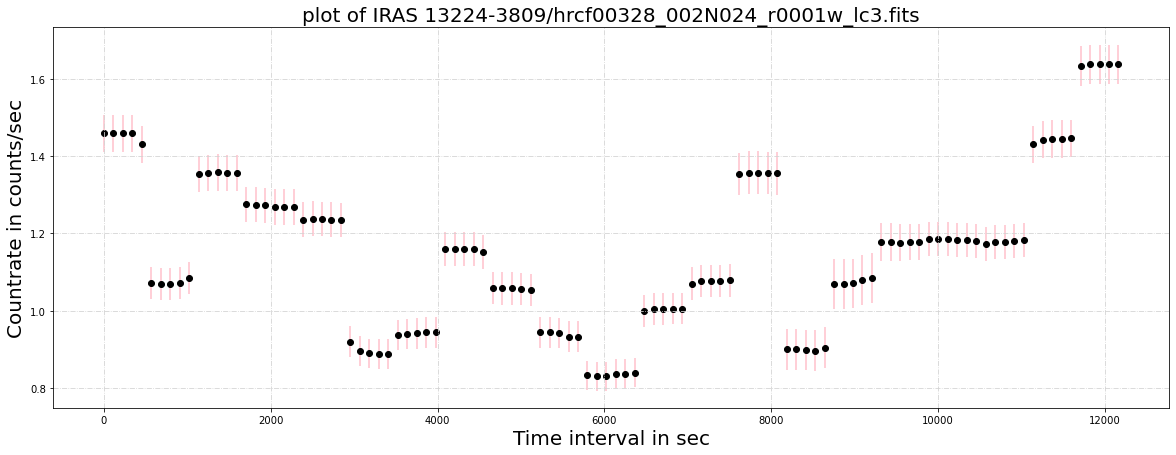

In [15]:
lc = result[1].data #Lightcurve
bg = result[2].data #Background

time = lc['Time']
resolution = time[1]-time[0]
print(f'Resolution = {resolution} s')
lc_count_rate = lc['COUNT_RATE']
lc_count_rate_err = lc['COUNT_RATE_ERR']


dt = time - time[0]

plt.figure(figsize = [20,7], facecolor = 'w')
plt.scatter(dt, lc_count_rate, c = 'k')
#plt.scatter(dt, lc_count_rate, c = 'k', zorder = 1)
plt.errorbar(dt, lc_count_rate, lc_count_rate_err, fmt = 'none', c = 'pink', zorder = 0)
plt.grid(color = 'lightgrey', ls = '-.')
plt.xlabel('Time interval in sec', fontsize = 20)
plt.ylabel('Countrate in counts/sec', fontsize = 20)
plt.title(f'plot of {file_name}', fontsize = 20)
#plt.text(10000,2.8e-5, s = f'resolution = {resolution} s', fontsize = 20)
#plt.xlim(0,10000)
#plt.ylim(0,0.0009)

In [10]:
plt.hist?

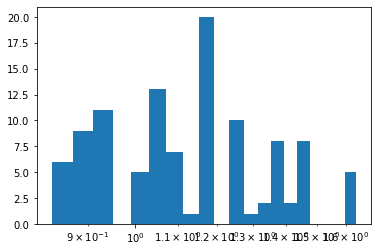

In [14]:
plt.hist(lc_count_rate, bins = 20)
plt.xscale('log')

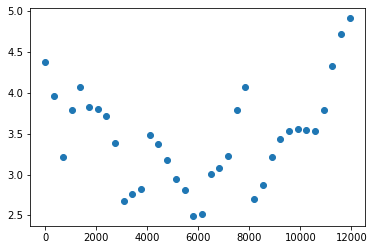

In [18]:

n=36
cr3= np.zeros(n)
t3= [0 for i in range(n)]
for i in range(n):
    t3[i] = dt[3*i]
for i in range(n):
    for j in range(3):
        #summing all the counts 
        cr3[i] += lc_count_rate[j+i*3]
        
plt.scatter(t3,cr3)


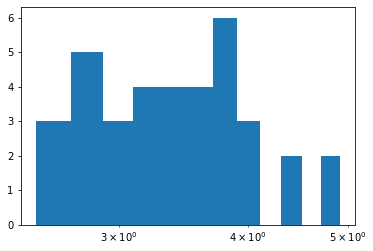

In [22]:
plt.hist(cr3, bins = 12)
plt.xscale('log')